# Applied Mathematics 115: Mathematical Modeling  
---
*2024 Spring / Full Term*

**Meeting Time:**  
Tuesday 10:30 AM - 11:45 AM  
Thursday 10:30 AM - 11:45 AM
<br>
<br>

**Instructors:**  
*Michael P. Brenner* (Pierce Hall 313) brenner@seas.harvard.edu  
Francesco Mottes fmottes@seas.harvard.edu  

**Teaching Fellows:**  
Henry Bae henrybae@college.harvard.edu  
Sarah Martinson sarahmartinson@g.harvard.edu  
Shruti Sharma ssharma1@g.harvard.edu  
Al Shodiev alshodiev@college.harvard.edu  
Alex Sullivan alexsullivan@college.harvard.edu  
Matt Tibbitts mtibbitts@college.harvard.edu  

# Classification in terms of Conditional Probability

In a classification problem, especially in the settings we are introduced in class (The real world comes with lots of different variables and noise), we are interested in a model that will output probability of a class given the data. In other words, we would like to obtain a conditional distribution $P(Y|X)$, where $Y$ is the class (response) and $X$ is the data (predictor). This would allow us to examine how confident the model is in the prediction that it makes, and in turn determine how precise the model is in its predictions. For example, if the model predicted that in a certain scenario (input variables like time, location, etc) there will be a flood with a probability of 0.99, but in reality there was no flood, one would likely prefer a model that only predicted a probability of 0.4.

Now with this in mind, we can state the classification problem as follows:

\begin{align*}
\text{Given a binary output variable } Y, \text{ construct a model for the conditional distribution } P(Y|X = x) \\
\text{as a function of } x, \text{ where } x \text{ is the input data.}
\end{align*}

# Logistic Regression

Logistic Regression is a statistical method used for **binary classification problems**, where the outcome/dependent variable is categorical and has **two** possible classes (usually 0 and 1). When predicting the probability of an event, like predicting whether there will be a flood with a certain amount of rainfall, logistic regression can give the probability that the outcome belongs to a particular class.

We briefly discussed this in class to model the world series problem, but we will go into further detail and provide the motivation behind logistic regression, as well as how it relates to the maximum likelihood estimations and the principles that we will continue to use throughout the course.

We start from the **logit** function:

\begin{align*}
\text{logit}(p) = \log \frac{p}{1-p}
\end{align*}

The code below shows the logit function plotted against the probability $p$. Note that we are not going all the way to 0 and hence the finite range here. Try to modify the minimum and maximum value in ```p_values``` to see how the graph changes.

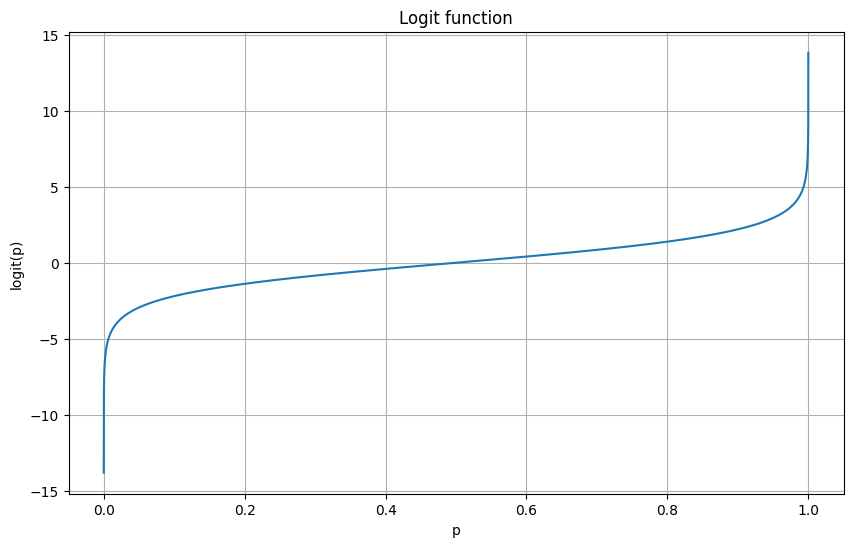

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_logit():
    # Define the logit function
    logit = lambda p: np.log(p / (1 - p))

    # Generate values between 0 and 1 (exclusive)
    p_values = np.linspace(0.000001, 0.999999, 10000)

    # Compute the logit for each value
    logit_values = logit(p_values)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(p_values, logit_values)
    plt.title('Logit function')
    plt.xlabel('p')
    plt.ylabel('logit(p)')
    plt.grid(True)
    plt.show()

plot_logit()


This essentially makes the output range of the function to be $(-\infty, \infty)$. With this, we can define the logistic regression model as follows:

\begin{align*}
\log \frac{p(x)}{1-p(x)} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p = \beta_0 + \beta^T x
\end{align*}

where $p(x) = P(Y=1|X=x)$, and $x = (x_1, x_2, ..., x_p)$ are the input variables. This is basically in the same form as a linear regression problem now! When we solve for $p(x)$, we get the familiar **logistic function**:

\begin{align*}
p(x) = \frac{e^{\beta_0 + \beta^T x}}{1 + e^{\beta_0 + \beta^T x}} = \frac{1}{1 + e^{-(\beta_0 + \beta^T x)}}
\end{align*}

(A tangent, but one also encounters this in the form of the **Boltzmann distribution** in statistical physics)

Below is what this looks like with 1 variable.


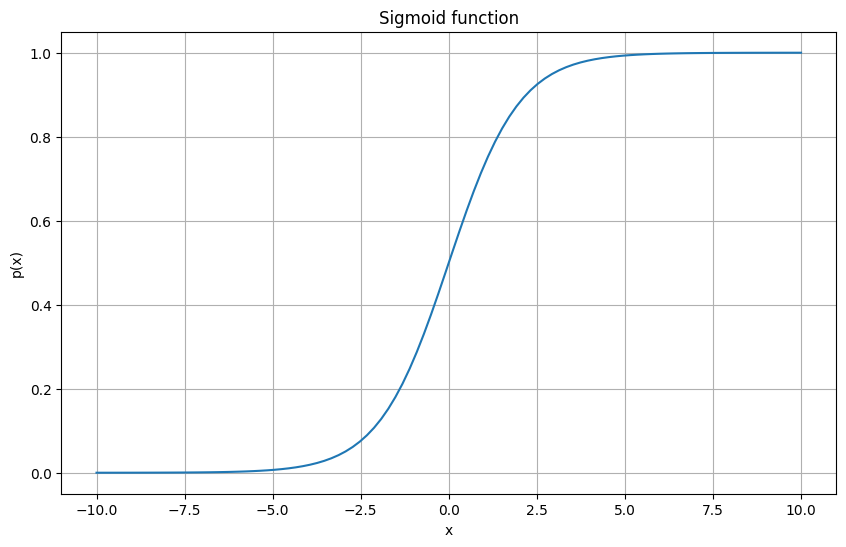

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sigmoid():
    # Define the sigmoid function
    sigmoid = lambda x: 1 / (1 + np.exp(-x))

    # Generate values between -10 and 10
    x_values = np.linspace(-10, 10, 100)

    # Compute the sigmoid for each value
    sigmoid_values = sigmoid(x_values)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, sigmoid_values)
    plt.title('Sigmoid function')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.grid(True)
    plt.show()

plot_sigmoid()

This is what it looks like with 2 variables. This function will be in a much higher dimension with more variables, but the idea is the same.

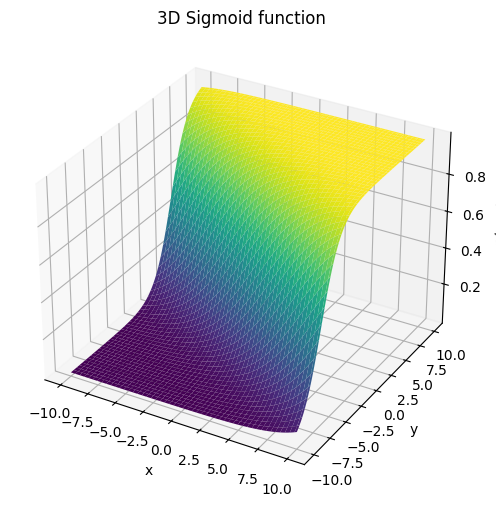

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_sigmoid():
    # Define the sigmoid function
    sigmoid = lambda x: 1 / (1 + np.exp(-x))

    # Generate values between -10 and 10 for both variables
    x_values = np.linspace(-10, 10, 100)
    y_values = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x_values, y_values)

    # Random coefficients
    beta0 = np.random.rand()
    beta1 = np.random.rand()
    beta2 = np.random.rand()

    # Compute the sigmoid for each combination of values
    Z = sigmoid(beta0 + beta1 * X + beta2 * Y)

    # Plot the results
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title('3D Sigmoid function')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('p(x, y)')
    plt.show()

plot_3d_sigmoid()

For classification, we also need to decide the **decision boundary**. In other words, we need to decide the threshold for the probability that we will use to classify the data. For example, if we set the threshold to be 0.5, then we will classify the data as 1 if $p(x) > 0.5$, and 0 otherwise.

### Maximum Likelihood Estimation - Dealing with Data

Now we have the proposed model, but how do we find the parameters $\beta_0, \beta$? We turn again to the **maximum likelihood estimation**. We see from our definition that $p(x)$ depends on the parameters $\beta_0, \beta$. Now, consider a set of data points $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$, where $x_i$ are the input variables and $y_i$ are the corresponding output variables. For data points where $y_i = 1$, we have $p(x_i)$, and for data points where $y_i = 0$, we have $1 - p(x_i)$ (This is very similar to the what we dealt with in the Bernoulli case). We can combine these two cases into one expression:

\begin{align*}
L(\beta_0, \beta) = \prod_{i=1}^n p(x_i)^{y_i} (1 - p(x_i))^{1 - y_i}
\end{align*}

Now, we turn this into the log-likelihood function:

\begin{align*}
l(\beta_0, \beta) &= \log L(\beta_0, \beta) \\
&= \sum_{i=1}^n y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i))\\
&= \sum_{i=1}^n \log (1 - p(x_i)) + \sum_{i=1}^n y_i \log \frac{p(x_i)}{1 - p(x_i)} \\
&= \sum_{i=1}^n \log (1 - p(x_i)) + \sum_{i=1}^n y_i (\beta_0 + \beta^T x_i) \\
&= \sum_{i=1}^n \log(-1 + e^{\beta_0 + \beta^T x_i}) + \sum_{i=1}^n y_i (\beta_0 + \beta^T x_i)
\end{align*}

We can now take the derivative of this expression and set it to 0 to find the maximum likelihood estimators for $\beta_0, \beta$. This is not too simple, however, and there are different techniques to solve this which is beyond the scope of this course (See: AM205). Fortunatley, there are libraries and tools out there that can do this for us.


